<h2><center>ING3 GEE: Devoir Maison</center></h2> 
<img src="autonomousCar.jpeg" width=300 height=300 />
   <h3><center> Gradient descent optimization with LASSO and autonomous driving</center></h3> 
   
   <center><font color='red'><b>Given date: Tuesday Nov 22</b></font></center>

<center><font color='red'><b>Due date: Friday December 13 </b></font></center>



### Question 1. (5pts) Local vs global minimas and gradient descent

We consider the following function.

\begin{align}
F(x_1, x_2) =  3(1-x_1)^2\exp(-(x_1^2) - (x_2+1)^2)\\ 
   - 10(x_1/5 - x_1^3 - x_2^5)\exp(-x_1^2-x_2^2)\\
   - (1/3)\exp(-(x_1+1)^2 - x_2^2)
\end{align}

The surface plot of this function is given below together with its contour plot. The function has a single global minimum located near $(0.23, -1.62)$ and shown in red in the contour plot.

We want to implement gradient descent iterations on that function. Starting from a random initial point $(x_1, x_2)$, code the following updates 

\begin{align}
x_1^{(k+1)} = x_1^{(k)} - \eta * \text{grad}_{x_1} F(x_1, x_2)\\
x_2^{(k+1)} = x_2^{(k)} - \eta * \text{grad}_{x_2} F(x_1, x_2)
\end{align}

where $\text{grad}_{x_i}$ represents the gradient of $F(x_1, x_2)$ with respect to $x_i$. Choose a sufficiently small learning rate and plot the iterates (in white) on the contour plot. Repeat your experiments for various initial iterates.  

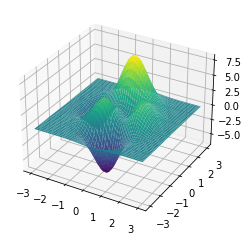

In [3]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, y)
F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
plt.show()



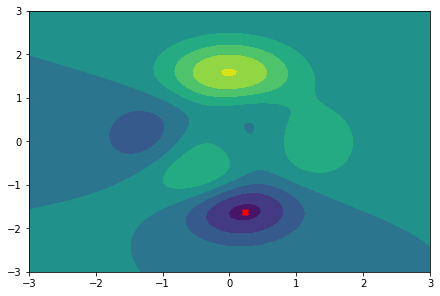

In [4]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
plt.show()

In [ ]:
# put your solution here




### Question 2. Solving LASSO  (10pts)

Learning a model through the OLS loss can be done very efficiently through either gradient descent or even through the Normal equations. The same is true for ridge regression. For LASSO however, the non differentiability of the absolute value at $0$ makes the learning more tricky.


One approach, known as _ISTA (Iterative Shrinkage-Thresholding Algorithm)_ consists in combining traditional gradient descent steps with a projection onto the $\ell_1$ norm ball. Concretely, for LASSO 

\begin{align}
\ell(\boldsymbol \beta) = \|\boldsymbol X\boldsymbol \beta - \boldsymbol t\|^2_2 + \lambda \|\boldsymbol \beta\|_1
\end{align}

where the data has centered so that $\beta_0 = 0$. I.e.
\begin{align}
 \mathbf{x}^{(i)} \leftarrow \mathbf{x}^{(i)}-  \frac{1}{N}\sum_{i=1}^{N} \mathbf{x}^{(i)}\\
t^{(i)} \leftarrow t^{(i)} - \frac{1}{N}\sum_{i=1}^N t^{(i)}
\end{align}

The ISTA update takes the form 

\begin{align}
\boldsymbol \beta^{k+1} \leftarrow \mathcal{T}_{\lambda \eta} (\boldsymbol \beta^{k} - 2\eta \mathbf{X}^T(\mathbf{X}\mathbf{\beta} - \mathbf{t}))
\end{align}

where $\mathcal{T}_{\lambda \eta}(\mathbf{x})_i$ is the thresholding operator defined <font color='red'>component-wise</font> as

\begin{align}
\mathcal{T}_{\lambda \eta}(\mathbf{\beta})_i = (|\beta_i| - \lambda \eta)_+ \text{sign}(\beta_i)
\end{align}

In the equations above, $\eta$ is an appropriate step size and $(x)_+ = \max(x, 0)$ 

##### Question 2.2. (6pts)

Complete the function 'ISTA' below which must return a final estimate for the regression vector $\mathbf{\beta}$ given a feature matrix $\mathbf{X}$, a target vector $\mathbf{t}$ (the function should include the centering steps for $\mathbf{x}_i$ and $t_i$) regularization weight $\lambda$, and the choice for the learning rate $\eta$. 

In [ ]:
import numpy as np

def ISTA(beta_init, X, t, lbda, eta): 
     
    '''The function takes as input an initial guess for beta, a set  
    of feature vectors stored in X and their corresponding 
    targets stored in t, a regularization weight lbda,  
    step size parameter eta and must return the  
    regression vector following from the minimization of  
    the LASSO objective''' 
     
    
    return beta 

##### Question 2.2.  (4pts)

Apply your algorithm to the data (in red) given below for polynomial features up to degree 6 and for various values of $\lambda$. Display the result on top of the true model (in blue). Note that for $\beta_0$ to be identically zero in the model including the higher degree features, the centering should be done after generating those features.

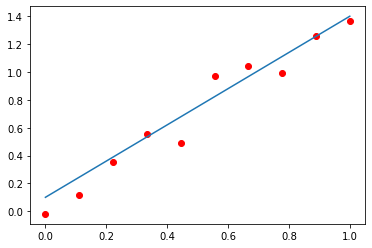

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from math import sqrt
import numpy as np
from scipy import linalg
 
x = np.linspace(0,1,10) 
xtrue = np.linspace(0,1,100) 
t_true = 0.1 + 1.3*xtrue 
 
t = 0.1 + 1.3*x 
 
tnoisy  = t+np.random.normal(0,.1,len(x)) 
 

plt.scatter(x, tnoisy, c='r') 
plt.plot(xtrue, t_true) 
plt.show()

### Question 3: Convolutional Neural Network and Autonomous Driving (10pts)

In this third part, we will use [the Keras API](https://keras.io/) to build and train a convolutional neural network to discriminate between four types of road signs. To simplify we will consider the detection of 4 different signs: 

- A '30 km/h' sign (folder 1)
- A 'Stop' sign 
- A 'Go straight' sign
- A 'Keep left' sign 


<img src="learning2Drive.jpeg" style="width:400px">


An example of each sign is given below.

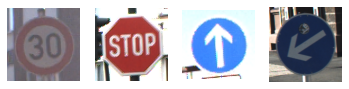

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('1/00001_00000_00012.png')
plt.subplot(141)
plt.imshow(img1)
plt.axis('off')
plt.subplot(142)
img2 = mpimg.imread('2/00014_00001_00019.png')
plt.imshow(img2)
plt.axis('off')
plt.subplot(143)
img3 = mpimg.imread('3/00035_00008_00023.png')
plt.imshow(img3)
plt.axis('off')
plt.subplot(144)
img4 = mpimg.imread('4/00039_00000_00029.png')
plt.imshow(img4)
plt.axis('off')
plt.show()

#### Question 3.1 (5pts) 
  
- Before building the network, you should start by cropping the images so that they all have a common predefined size (take the smallest size across all images) 

- We will use a __Sequential model__ from Keras but it will be up to you to define the structure of the convolution net. Initialization of the sequential model can be done with the following line 

In [ ]:
model = Sequential()

#### 3.1.a. Convolutions. 

- We will use a __convolutional__ architecture. you can add convolutional layers to the model by using the following lines 

In [ ]:
model.add(Conv2D(num_units, (filter_size1, filter_size2), padding='same',
                             input_shape=(IMG_SIZE, IMG_SIZE,3),
                             activation='relu'))
                     

for the first layer and                     

In [ ]:
model.add(Conv2D(filters, filter_size, activation, input_shape)

for all the others. 'filters' indicate the number of filters you want to use in the convolutional layer. filter_size is the size of each filter and activation is the usual activation that comes on top of the convolution, i.e.
$x_{\text{out}} = \sigma(\text{filter}*\text{input})$. Finally input_shape indicates the size of your input. Note that only the input layer should be given the input size. Subsequent layers will automatically compute the size of their inputs based on previous layers. 

#### 3.1.b Pooling Layers 

On top of the convolutional layers, convolutional neural networks (CNN) also often rely on __Pooling layers__. The addition of such a  layer can be done through the following line 

In [ ]:
 model.add(MaxPooling2D(pool_size=(filter_sz1, filter_sz2),strides=None))

The _pooling layers_ usually come with two parameters: the 'pool size' and the 'stride' parameter. The basic choice for the pool size is (2,2) and the stride is usually set to None (which means it will split the image into non overlapping regions such as in the Figure below). You should however feel free to play a little with those parameters. The __MaxPool operator__ considers a mask of size 'pool_size' which is slided over the image by a number of pixels equal to the stride parameters (in x and y, there are hence two translation parameters). for each position of the mask, the output only retains the max of the pixels appearing in the mask (This idea is illustrated below). One way to understand the effect of the pooling operator is that if the filter detects an edge in a subregion of the image (thus returning at least one large value), although a MaxPooling will reduce the number of parameters, it will keep track of this information.    

Adding 'Maxpooling' layers is known to work well in practice. 

<img src="Maxpool.png" style="width:500px">


Although it is a little bit up to you to decide how you want to structure the network, a good start is to add a couple (definitely not exceeding 4) combinations (convolution, convolution, Pooling) with increasing number of units (you do every power of two like 16, 32, 128,...). 

#### 3.1.c. Flattening and Fully connected layers

Once you have stacked the convolutional and pooling layers, you should flatten the output through a line of the form

In [ ]:
model.add(Flatten())

And add a couple (no need to put more than 2,3) dense fully connected layers through lines of the form

In [ ]:
model.add(Dense(num_units, activation='relu'))

#### 3.1.d. Concluding 

Since there are four possible signs, you need to __finish your network with a dense layer with 4 units__. Each of those units should output four number between 0 and 1 representing the likelihood that any of the four signs is detected and such that $p_1 + p_2 + p_3 + p_4 = 1$ (hopefully with one probability much larger than the others). For this reason, a good choice for the __final activation function__ of those four units is the __softmax__ (Why?). 


Build your model below. 

In [ ]:
model = Sequential()

# construct the model using convolutional layers, dense fully connected layers and 



#### Question 3.2 (3pts). Setting up the optimizer

Once you have found a good architecture for your network, split the dataset, by retaining about 90% of the images for training and 10% of each folder for test. To train your network in Keras, we need two more steps. The first step is to set up the optimizer. Here again it is a little bit up to you to decide how you want to set up the optimization. Two popular approaches are __SGD and ADAM__. You will get to choose the learning rate. This rate should however be between 1e-3 and 1e-2. Once you have set up the optimizer, we need to set up the optimization parameters. This includes the loss (we will take it to be the __categorical cross entropy__ which is the extension of the log loss to the multiclass problem).

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# set up the optimize here
# Myoptimizer = SGD
# Myoptimizer = Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Myoptimizer,
              metrics=['accuracy'])

#### Question 3.3 (2pts). Optimization

The last step is to fit the network to your data. Just as any function in scikit-learn, we use a call to the function 'fit'. The training of neural networks can be done by splitting the dataset into minibatches and using a different batch at each SGD step. This process is repeated over the whole dataset. A complete screening of the dataset is called an epoch. We can then repeat this idea several times. In keras the number of epochs is stored in the 'epochs' parameter and the batch size is stored in the 'batch_size' parameter.   

In [ ]:
batch_size = '''set the size of the batch here'''
epochs = '''set number of epochs here'''

model.fit(X, t,batch_size=batch_size,epochs=epochs, validation_split=0.2)